<a href="https://colab.research.google.com/github/Neel7317/Generative-Models/blob/main/Simple_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Input,Dense

In [7]:
from tensorflow.keras.models import Model


In [11]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [14]:
import matplotlib.pyplot as plt

In [19]:
np.random.seed(42)
#tf.random.seed(42)

In [24]:
datasets=tf.keras.datasets.mnist

In [45]:
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [46]:
x_train=x_train/255
x_test=x_test/255

In [30]:
x_train.shape

(60000, 28, 28)

In [47]:
x_train=np.reshape(x_train,(-1,28*28*1))# height*width*channel
x_test=np.reshape(x_test,(-1,28*28*1))

In [48]:
x_train.shape

(60000, 784)

In [49]:
laten_dim=32

In [50]:
#simple autoencoder..
input=Input(shape=(28*28,))
h=Dense(laten_dim,activation='relu')(input)
output=Dense(28*28,activation='sigmoid')(h)

In [51]:
autoencoder=Model(input,output)
autoencoder.summary()#in summary you can clearly see that input and output datashape are identical

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 dense_5 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [52]:
autoencoder.compile(optimizer=Adam(1e-3),loss='binary_crossentropy')

In [53]:
autoencoder.fit(x_train,x_train,batch_size=256,epochs=50,validation_data=(x_test,x_test))

Epoch 1/50
235/235 [==============================] - 3s 13ms/step - loss: 0.2771 - val_loss: 0.1928
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1731 - val_loss: 0.1554
Epoch 3/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1456 - val_loss: 0.1349
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1294 - val_loss: 0.1219
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1190 - val_loss: 0.1137
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1119 - val_loss: 0.1077
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1069 - val_loss: 0.1036
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1032 - val_loss: 0.1004
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1004 - val_loss: 0.0979
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0983 - val_lo

In [54]:
test_pred_y=autoencoder.predict(x_test)

In [57]:
test_pred_y[0].shape

(784,)

# **Reconstructed Image** 

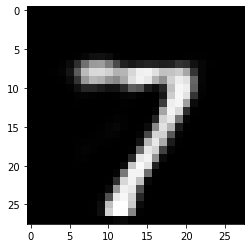

In [59]:
plt.imshow(test_pred_y[0].reshape(28,28))
plt.gray()

# **Original Image**

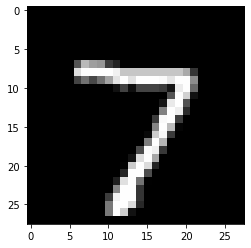

In [60]:
plt.imshow(x_test[0].reshape(28,28))
plt.gray()

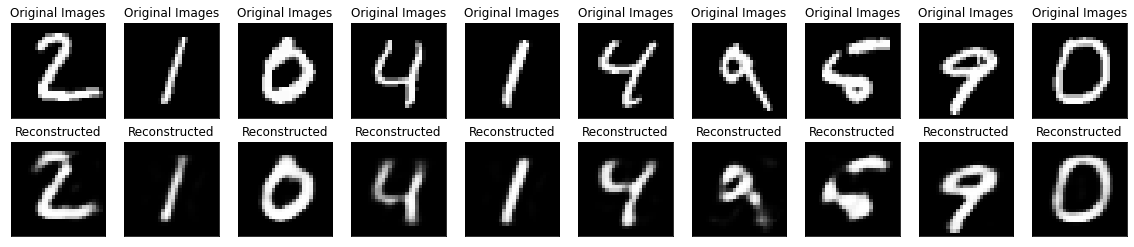

In [66]:
n=10
plt.figure(figsize=(20,4))
for i in range(1,11):
  #original Image
  ax=plt.subplot(2,n,i)
  ax.set_title('Original Images')
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  #Reconstructed Image
  ax=plt.subplot(2,n,i+n)
  ax.set_title('Reconstructed')
  plt.imshow(test_pred_y[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
